<a href="https://colab.research.google.com/github/John260260/Classification_problms_ML/blob/main/pandas_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"to increase Ram from 12 gb to 25 gb"
#a = []
#while(1):
#    a.append(‘1’)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/sales_data_types.csv')

In [ ]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,"$125,000.00","$162,500.00",30.00%,500,1,10,2015,Y
1,552278,Smith Plumbing,"$920,000.00","$1,012,000.00",10.00%,700,6,15,2014,Y
2,23477,ACME Industrial,"$50,000.00","$62,500.00",25.00%,125,3,29,2016,Y
3,24900,Brekke LTD,"$350,000.00","$490,000.00",4.00%,75,10,27,2015,Y
4,651029,Harbor Co,"$15,000.00","$12,750.00",-15.00%,Closed,2,2,2014,N


In [ ]:
# Let’s try adding together the 2016 and 2017 sales:

df['2016']+df['2017']

0      $125,000.00 $162,500.00 
1    $920,000.00 $1,012,000.00 
2        $50,000.00 $62,500.00 
3      $350,000.00 $490,000.00 
4        $15,000.00 $12,750.00 
dtype: object

In [ ]:
df.dtypes

Customer Number     int64
Customer Name      object
2016               object
2017               object
Percent Growth     object
Jan Units          object
Month               int64
Day                 int64
Year                int64
Active             object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer Number  5 non-null      int64 
 1   Customer Name    5 non-null      object
 2   2016             5 non-null      object
 3   2017             5 non-null      object
 4   Percent Growth   5 non-null      object
 5   Jan Units        5 non-null      object
 6   Month            5 non-null      int64 
 7   Day              5 non-null      int64 
 8   Year             5 non-null      int64 
 9   Active           5 non-null      object
dtypes: int64(4), object(6)
memory usage: 528.0+ bytes


In [ ]:
# After looking at the automatically assigned data types, there are several concerns:

# The Customer Number : is a float64 but it should be an int64
# The 2016 and 2017   : columns are stored as objects, not numerical values such as a float64 or 
#                       int64
# Percent Growth and Jan Units : also stored as objects not numerical values
# Month , Day and Year columns : should be converted to datetime64
# The Active column   : should be a boolean

# clean up these data types

# In order to convert data types in pandas, there are three basic options:

# Use astype() to force an appropriate dtype
# Create a custom function to convert the data
# Use pandas functions such as to_numeric() or to_datetime()

In [ ]:
#df["Customer Number"] = df['Customer Number'].astype('int')
# does not work
df['2016']=df['2016'].astype('float')

ValueError: ignored

In [ ]:
# does not work, because of value 'closed' in this column
df['Jan Units'].astype('int')

In [ ]:
# In each of the cases, the data included values that could not be interpreted as numbers. 
# In the sales columns, the data includes a currency symbol as well as a comma in each value. 
# In the Jan Units columnm the last value is “Closed” which is not a number; 

# so we get the exception.

In [ ]:
df['Active'].astype('bool')

0    True
1    True
2    True
3    True
4    True
Name: Active, dtype: bool

In [ ]:
# At first glance, this looks ok but upon closer inspection, there is a big problem. 
# All values were interpreted as True but the last customer has an Active flag of N so this does 
# not seem right.

# The takeaway is that astype() will only work if:

    # the data is clean and can be simply interpreted as a number
    # you want to convert a numeric value to a string object
    
# If the data has non-numeric characters or is not homogeneous, then astype() will not work

# You will need to do additional transforms for the type change to work correctly.

# Custom Conversion Functions

In [ ]:
    """
    Convert the string number value to a float
     - Remove $
     - Remove commas
     - Convert to float type
    """

    def convert_currency(val):

      new_val=val.replace(',','').replace('$','')
      return float(new_val)

In [ ]:
# use the pandas apply function to apply this to all the values in the 2016 column.

df['2016'].apply(convert_currency)

0    125000.0
1    920000.0
2     50000.0
3    350000.0
4     15000.0
Name: 2016, dtype: float64

In [ ]:
df['2016']=df['2016'].apply(convert_currency)
df['2017']=df['2017'].apply(convert_currency)

In [ ]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,30.00%,500,1,10,2015,Y
1,552278,Smith Plumbing,920000.0,1012000.0,10.00%,700,6,15,2014,Y
2,23477,ACME Industrial,50000.0,62500.0,25.00%,125,3,29,2016,Y
3,24900,Brekke LTD,350000.0,490000.0,4.00%,75,10,27,2015,Y
4,651029,Harbor Co,15000.0,12750.0,-15.00%,Closed,2,2,2014,N


In [ ]:
    """
    Convert the percentage string to an actual floating point percent
    - Remove %
    - Divide by 100 to make decimal
    """
def convert_percent(val):
  new_val=val.replace('%','')
  return float(new_val)/100


In [ ]:
df['Percent Growth'].apply(convert_percent)

0    0.30
1    0.10
2    0.25
3    0.04
4   -0.15
Name: Percent Growth, dtype: float64

In [ ]:
df['Percent Growth']=df['Percent Growth'].apply(convert_percent)

In [ ]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500,1,10,2015,Y
1,552278,Smith Plumbing,920000.0,1012000.0,0.10,700,6,15,2014,Y
2,23477,ACME Industrial,50000.0,62500.0,0.25,125,3,29,2016,Y
3,24900,Brekke LTD,350000.0,490000.0,0.04,75,10,27,2015,Y
4,651029,Harbor Co,15000.0,12750.0,-0.15,Closed,2,2,2014,N


In [ ]:
np.unique(df['Active'])

array(['N', 'Y'], dtype=object)

In [ ]:
# using np.where() to convert the active column to a boolean. 

# The basic idea is to use the np.where() function to convert all “Y” values to True and 
# everything else assigned False

df['Active']=np.where(df['Active']=='Y',True,False)

In [ ]:
df['Active'].dtype

dtype('bool')

In [ ]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active
0,10002,Quest Industries,125000.0,162500.0,0.30,500,1,10,2015,True
1,552278,Smith Plumbing,920000.0,1012000.0,0.10,700,6,15,2014,True
2,23477,ACME Industrial,50000.0,62500.0,0.25,125,3,29,2016,True
3,24900,Brekke LTD,350000.0,490000.0,0.04,75,10,27,2015,True
4,651029,Harbor Co,15000.0,12750.0,-0.15,Closed,2,2,2014,False


In [ ]:
# Series
# A Series is a one-dimensional array-like object containing a sequence 
# of values (of similar types to NumPy types) and an associated array of 
# data labels, called its index.

In [ ]:
series1=pd.Series(list('abcd'))

series1

0    a
1    b
2    c
3    d
dtype: object

In [ ]:
city=pd.Series(['bangluru','delhi','mumbi']) #(list(['bangluru','delhi','mumbi']))
city

0    bangluru
1       delhi
2       mumbi
dtype: object

In [ ]:
obj=pd.Series([1,2,3,-4,2])
obj

0    1
1    2
2    3
3   -4
4    2
dtype: int64

In [ ]:
obj2 =pd.Series([1,2,3,6,7], index=['a','b','c','d','e'])
obj2

a    1
b    2
c    3
d    6
e    7
dtype: int64

In [ ]:
obj2['c']

3

In [ ]:
# Using NumPy functions or NumPy-like operations

In [ ]:
obj2 > 3

a    False
b    False
c    False
d     True
e     True
dtype: bool

In [ ]:
obj2[obj2>3]

d    6
e    7
dtype: int64

In [ ]:
obj2*2

a     2
b     4
c     6
d    12
e    14
dtype: int64

In [ ]:
np_cities=np.array(['mumb','del','chennai','bangluru'])

In [ ]:
cities_series=pd.Series(np_cities)

In [ ]:
cities_series

0        mumb
1         del
2     chennai
3    bangluru
dtype: object

In [ ]:
# series is sort of dict
# as it is a mapping of index values to data values

In [ ]:
obj2

a    1
b    2
c    3
d    6
e    7
dtype: int64

In [ ]:
'b' in obj2

True

In [ ]:
'f' in obj2

False

In [ ]:
# building Series from Python dict
# dict keys ==> index
# dict values ==> Series values
# Resultant Series is sorted
citydata = {'Hybd': 35000, 'Bangalore': 71000, 'Delhi': 16000, 'Chennai': 5000}

In [ ]:
obj3 = pd.Series(citydata)
obj3

Hybd         35000
Bangalore    71000
Delhi        16000
Chennai       5000
dtype: int64

In [ ]:
citynames = ['Hybd', 'Delhi', 'Bangalore', 'Chennai']

In [ ]:
obj4 = pd.Series(citydata, index=citynames) #sorting obj3
obj4

Hybd         35000
Delhi        16000
Bangalore    71000
Chennai       5000
dtype: int64

In [ ]:
# A useful Series feature for many applications is that it automatically 
# aligns by index label in arithmetic operations
# more like RDBMS join operation

In [ ]:
obj3+obj4

Bangalore    142000
Chennai       10000
Delhi         32000
Hybd          70000
dtype: int64

In [ ]:
# series from scalar input

scalar_series = pd.Series(100, index=['pos1', 'pos2','pos3'])
scalar_series

pos1    100
pos2    100
pos3    100
dtype: int64

In [ ]:
scalar_series2=pd.Series([100,200,300], index=['pos1','pos2','pos3'])
scalar_series2

pos1    100
pos2    200
pos3    300
dtype: int64

In [ ]:
# access series
scalar_series2['pos2']

200

In [ ]:
scalar_series2[1]

200

In [ ]:
scalar_series2['pos1':'pos3']

pos1    100
pos2    200
pos3    300
dtype: int64

In [ ]:
# vectorize operations
vector1=pd.Series([1,2,3,4,5], index=['a','b','c','d','e'])
vector2=pd.Series([10,20,30,40,50], index=['a','b','c','d','e'])

In [ ]:
vector1+vector2

a    11
b    22
c    33
d    44
e    55
dtype: int64

In [ ]:
vector1*vector2

a     10
b     40
c     90
d    160
e    250
dtype: int64

In [ ]:
vector2/vector1

a    10.0
b    10.0
c    10.0
d    10.0
e    10.0
dtype: float64

In [ ]:
vector3 = pd.Series([10,20,300,400], index=['a', 'b','e','f'])

In [ ]:
vector1+vector2+vector3

a     21.0
b     42.0
c      NaN
d      NaN
e    355.0
f      NaN
dtype: float64

In [ ]:
data={'Country':['Switzerland','UK','US','Singapore','Canada'],
      'Capital':['Bern','London','Washington','Singapore','Ottawa'],
      'Population':[8540000,66600000,328200000,5703569,37650000]}

In [ ]:
df=pd.DataFrame(data)
df

,Country,Capital,Population
0,Switzerland,Bern,8540000
1,UK,London,66600000
2,US,Washington,328200000
3,Singapore,Singapore,5703569
4,Canada,Ottawa,37650000


In [ ]:
data_dict={'col1':[1,2],'col2':[3,4],'col':[5,6],'col4':[7,8]}

In [ ]:
df2=pd.DataFrame(data_dict)

In [ ]:
df2

,col1,col2,col,col4
0,1,3,5,7
1,2,4,6,8


In [ ]:
df2.dtypes

col1    int64
col2    int64
col     int64
col4    int64
dtype: object

In [ ]:
df2.shape

(2, 4)

In [ ]:
data_dicts={'one':pd.Series([1,2,3,4], index=['a','b','c','d']),
            'two':pd.Series([4,5,6], index=['a','b','c'])}

In [ ]:
data_dicts

{'one': a    1
 b    2
 c    3
 d    4
 dtype: int64, 'two': a    4
 b    5
 c    6
 dtype: int64}

In [ ]:
df=pd.DataFrame(data_dicts)

In [ ]:
df

,one,two
a,1,4.0
b,2,5.0
c,3,6.0
d,4,NaN


In [ ]:
df=pd.DataFrame(data_dicts, index=['d','b','c'])
df

,one,two
d,4,NaN
b,2,5.0
c,3,6.0


In [ ]:
df=pd.DataFrame(data_dicts,index=['d','b','c'],columns=['python','spark'])
df

,python,spark
d,NaN,NaN
b,NaN,NaN
c,NaN,NaN


In [ ]:
df.index

Index(['d', 'b', 'c'], dtype='object')

In [ ]:
df.columns

Index(['python', 'spark'], dtype='object')

In [ ]:
# Constructing DataFrame from numpy ndarray/Lists
# Example - 1
data = {'one' : [1., 2., 3., 4.],
        'two' : [4., 3., 2., 1.]}

In [ ]:
pd.DataFrame(data)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [ ]:
pd.DataFrame(data, index=['a','b','c','d'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [ ]:
# From a list of dicts
data=[{'a':1,'b':2,'c':3}, {'a':5,'b':6,'c':7}]

In [ ]:
pd.DataFrame(data, index=['A','B'], columns=['a','b','c'])

,a,b,c
A,1,2,3
B,5,6,7


In [ ]:
data_dict={'one':pd.Series([1,2,3,4], index=['a','b','c','d']),
           'two':pd.Series([6,7,8], index=['a','b','c'])}

In [ ]:
df=pd.DataFrame(data_dict)
df

,one,two
a,1,6.0
b,2,7.0
c,3,8.0
d,4,NaN


In [ ]:
df['one']

a    1
b    2
c    3
d    4
Name: one, dtype: int64

In [ ]:
df['three']=df['one']*df['two']

In [ ]:
df

,one,two,three
a,1,6.0,6.0
b,2,7.0,14.0
c,3,8.0,24.0
d,4,NaN,NaN


In [ ]:
df['flag']=df[df['one']>2]
df

ValueError: ignored

In [ ]:
del df['three']

In [ ]:
df

,one,two
a,1,6.0
b,2,7.0
c,3,8.0
d,4,NaN


In [ ]:
# When inserting a scalar value, it will naturally be propagated to fill 
# the column:
df['pole'] = 'heart'
df

,one,two,pole
a,1,6.0,heart
b,2,7.0,heart
c,3,8.0,heart
d,4,NaN,heart


In [ ]:
# handling missing values

In [ ]:
series1 = pd.Series([1,2,3,4,5], index=['a', 'b', 'c', 'd', 'e'])
series2 = pd.Series([1,2,3,4,5], index=['c', 'e', 'f', 'g', 'h'])

In [ ]:
series1=pd.Series([1,2,4,5,6], index=['a','b','c','d','e'])
series2=pd.Series([1,2,4,5,6], index=['c','e','f','g','h'])

In [ ]:
sum_series=series1+series2

In [ ]:
sum_series

a    NaN
b    NaN
c    5.0
d    NaN
e    8.0
f    NaN
g    NaN
h    NaN
dtype: float64

In [ ]:
sum_series[sum_series.isnull()]

a   NaN
b   NaN
d   NaN
f   NaN
g   NaN
h   NaN
dtype: float64

In [ ]:
sum_series.isnull()

a     True
b     True
c    False
d     True
e    False
f     True
g     True
h     True
dtype: bool

In [ ]:
sum_series.dropna()

c    5.0
e    8.0
dtype: float64

In [ ]:
droped_n=sum_series.dropna()

In [ ]:
sum_series

a    NaN
b    NaN
c    5.0
d    NaN
e    8.0
f    NaN
g    NaN
h    NaN
dtype: float64

In [ ]:
sum_series.fillna(100)

a    100.0
b    100.0
c      5.0
d    100.0
e      8.0
f    100.0
g    100.0
h    100.0
dtype: float64

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Iris.csv',index_col='Id')

In [ ]:
df.index.name = None

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.columns=['sepal_length','sepal_width','petal_length','petal_width','class']

In [ ]:
#assigning new columns
df1=df.assign(sepal_ratio=df['sepal_width']/df['petal_length'])

In [ ]:
df1

,sepal_length,sepal_width,petal_length,petal_width,class,sepal_ratio
1,5.1,3.5,1.4,0.2,Iris-setosa,2.500000
2,4.9,3.0,1.4,0.2,Iris-setosa,2.142857
3,4.7,3.2,1.3,0.2,Iris-setosa,2.461538
4,4.6,3.1,1.5,0.2,Iris-setosa,2.066667
5,5.0,3.6,1.4,0.2,Iris-setosa,2.571429
...,...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica,0.576923
147,6.3,2.5,5.0,1.9,Iris-virginica,0.500000
148,6.5,3.0,5.2,2.0,Iris-virginica,0.576923
149,6.2,3.4,5.4,2.3,Iris-virginica,0.629630


In [ ]:
df.loc[140]

sepal_length               6.9
sepal_width                3.1
petal_length               5.4
petal_width                2.1
class           Iris-virginica
Name: 140, dtype: object

In [ ]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])

In [ ]:
df1+df2

,A,B,C,D
0,-1.784969,0.086795,0.829544,NaN
1,-2.160522,1.411044,-1.330784,NaN
2,-0.895794,-1.496866,1.131746,NaN
3,0.471868,1.026062,-1.584581,NaN
4,3.076389,-1.289992,1.940199,NaN
5,-0.788314,-2.264425,-0.041364,NaN
6,1.309101,0.683429,0.667522,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [ ]:
df1=pd.DataFrame({'a':[1,0,1],'b':[0,1,1]},dtype=bool)

df2=pd.DataFrame({'a':[0,1,1],'b':[1,1,0]},dtype=bool)

In [ ]:
df1,df2

(       a      b
 0   True  False
 1  False   True
 2   True   True,        a      b
 0  False   True
 1   True   True
 2   True  False)

In [ ]:
df1+df2

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


,a,b
0,True,True
1,True,True
2,True,True


In [ ]:
df1&df2

,a,b
0,False,False
1,False,True
2,True,False


In [ ]:
df1|df2

,a,b
0,True,True
1,True,True
2,True,True


In [ ]:
df1^df2

,a,b
0,True,True
1,True,False
2,False,True


In [ ]:
df1

,a,b
0,True,False
1,False,True
2,True,True


In [ ]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


In [ ]:
df=pd.DataFrame(np.random.randn(8,3),columns=['A','B','C'])

In [ ]:
df

,A,B,C
0,0.684906,-1.889581,-1.202136
1,-1.107930,0.528346,-0.072553
2,1.358129,-0.973722,-0.134024
3,1.893271,0.566181,1.193551
4,-0.167774,0.451470,0.240955
5,0.947859,0.187174,-1.391618
6,1.368854,0.947407,-0.632943
7,-1.345633,-0.538006,0.379443


In [ ]:
df.T

,0,1,2,3,4,5,6,7
A,0.684906,-1.107930,1.358129,1.893271,-0.167774,0.947859,1.368854,-1.345633
B,-1.889581,0.528346,-0.973722,0.566181,0.451470,0.187174,0.947407,-0.538006
C,-1.202136,-0.072553,-0.134024,1.193551,0.240955,-1.391618,-0.632943,0.379443


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/pandas_ex1.csv')

In [ ]:
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
# overriding the column names

df=pd.read_csv('/content/drive/MyDrive/pandas_ex1.csv', names=['Col1', 'Col2', 'Col3', 'Col4', 'message'])
df

,Col1,Col2,Col3,Col4,message
0,a,b,c,d,message
1,1,2,3,4,hello
2,5,6,7,8,world
3,9,10,11,12,foo


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/pandas_ex1.csv', names=None)
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [ ]:
names=['Col1', 'Col2', 'Col3', 'Col4', 'message']
df=pd.read_csv('/content/drive/MyDrive/pandas_ex1.csv', names=names,index_col='message')
df

,Col1,Col2,Col3,Col4
message,,,,
message,a,b,c,d
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [ ]:
df.index.name=None
df

,Col1,Col2,Col3,Col4
message,a,b,c,d
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/pandas_ex2.csv')
df

,Something,a,b,c,d,message
0,one,1.0,2.0,3.0,4,NaN
1,two,5.0,6.0,NaN,8,world
2,three,9.0,10.0,11.0,12,foo
3,four,NaN,NaN,4.0,Globe,NaN
4,five,NaN,NaN,NaN,NaN,Earth


In [ ]:
df.isnull()

,Something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False
3,False,True,True,False,False,True
4,False,True,True,True,True,False


In [ ]:
df['a'].isnull()

0    False
1    False
2    False
3     True
4     True
Name: a, dtype: bool

In [ ]:
# The na_values option can take either a list or set of strings to consider 
# missing values:
# Missing data is usually either not present (empty string) or marked by
# some sentinel value. 
# By default, pandas uses a set of commonly occurring sentinels,
# such as NA and NULL:
df = pd.read_csv('/content/drive/MyDrive/pandas_ex2.csv',
                 na_values='NA')
df

,Something,a,b,c,d,message
0,one,1.0,2.0,3.0,4,NaN
1,two,5.0,6.0,NaN,8,world
2,three,9.0,10.0,11.0,12,foo
3,four,NaN,NaN,4.0,Globe,NaN
4,five,NaN,NaN,NaN,NaN,Earth


In [ ]:
# Different NA sentinels can be specified for each column in a dict:
sentinels={'message':['foo','NA'],'Something':['two','three']}
df=pd.read_csv('/content/drive/MyDrive/pandas_ex2.csv',
                 na_values= sentinels,nrows=4 ) #nrows: Number of rows of file to read. Useful for reading pieces of large files.
df

,Something,a,b,c,d,message
0,one,1.0,2.0,3.0,4,NaN
1,NaN,5.0,6.0,NaN,8,world
2,NaN,9.0,10.0,11.0,12,NaN
3,four,NaN,NaN,4.0,Globe,NaN


In [ ]:
# Data Cleaning and Preparation
from numpy import nan as NA
df = pd.DataFrame([[1., 6.5, 3.], 
                     [1.,NA ,NA ],
                     [NA,NA ,NA ], 
                     [NA, 6.5, 3.]])
df

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
# dropna by default drops any row containing a missing value:
df.dropna()

,0,1,2
0,1.0,6.5,3.0


In [ ]:
# Passing how='all' will only drop rows that are all NA:
df.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [ ]:
df=pd.DataFrame(np.random.randn(10,3)*100)
df

,0,1,2
0,-2.443189,-107.199180,179.335359
1,-135.720553,-67.058246,6.684657
2,10.546317,-274.956374,113.062903
3,61.517674,-91.354141,118.119728
4,-136.699640,35.672114,-257.804280
5,162.669192,-231.086076,43.938324
6,7.754791,67.179421,153.611190
7,-2.616325,112.995202,136.096730
8,-58.778148,8.046451,-142.545620
9,-112.144849,-228.131772,-89.421296


In [ ]:
df.iloc[:4,1]= NA
df

,0,1,2
0,-2.443189,NaN,179.335359
1,-135.720553,NaN,6.684657
2,10.546317,NaN,113.062903
3,61.517674,NaN,118.119728
4,-136.699640,35.672114,-257.804280
5,162.669192,-231.086076,43.938324
6,7.754791,67.179421,153.611190
7,-2.616325,112.995202,136.096730
8,-58.778148,8.046451,-142.545620
9,-112.144849,-228.131772,-89.421296


In [ ]:
df.iloc[:2,2]=NA
df

,0,1,2
0,-2.443189,NaN,NaN
1,-135.720553,NaN,NaN
2,10.546317,NaN,113.062903
3,61.517674,NaN,118.119728
4,-136.699640,35.672114,-257.804280
5,162.669192,-231.086076,43.938324
6,7.754791,67.179421,153.611190
7,-2.616325,112.995202,136.096730
8,-58.778148,8.046451,-142.545620
9,-112.144849,-228.131772,-89.421296


In [ ]:
df.fillna(0)

,0,1,2
0,-2.443189,0.000000,0.000000
1,-135.720553,0.000000,0.000000
2,10.546317,0.000000,113.062903
3,61.517674,0.000000,118.119728
4,-136.699640,35.672114,-257.804280
5,162.669192,-231.086076,43.938324
6,7.754791,67.179421,153.611190
7,-2.616325,112.995202,136.096730
8,-58.778148,8.046451,-142.545620
9,-112.144849,-228.131772,-89.421296


In [ ]:
# fillna returns a new object, but you can modify the existing object in-place
df

,0,1,2
0,-2.443189,NaN,NaN
1,-135.720553,NaN,NaN
2,10.546317,NaN,113.062903
3,61.517674,NaN,118.119728
4,-136.699640,35.672114,-257.804280
5,162.669192,-231.086076,43.938324
6,7.754791,67.179421,153.611190
7,-2.616325,112.995202,136.096730
8,-58.778148,8.046451,-142.545620
9,-112.144849,-228.131772,-89.421296


In [ ]:
df.fillna(0,inplace=True)
df

,0,1,2
0,-2.443189,0.000000,0.000000
1,-135.720553,0.000000,0.000000
2,10.546317,0.000000,113.062903
3,61.517674,0.000000,118.119728
4,-136.699640,35.672114,-257.804280
5,162.669192,-231.086076,43.938324
6,7.754791,67.179421,153.611190
7,-2.616325,112.995202,136.096730
8,-58.778148,8.046451,-142.545620
9,-112.144849,-228.131772,-89.421296


In [ ]:
df=pd.DataFrame(np.random.randn(6,3))
df

,0,1,2
0,-1.038687,0.046055,-0.059372
1,1.889975,-1.023068,0.791198
2,-0.784772,-0.069366,0.868344
3,-0.606708,-1.576675,-1.047244
4,0.456155,-0.661763,0.241715
5,-0.910339,-0.970866,1.493955


In [ ]:
df.iloc[2:,1]=NA
df.iloc[4:,2]=NA
df

,0,1,2
0,-1.038687,0.046055,-0.059372
1,1.889975,-1.023068,0.791198
2,-0.784772,NaN,0.868344
3,-0.606708,NaN,-1.047244
4,0.456155,NaN,NaN
5,-0.910339,NaN,NaN


In [ ]:
df.fillna(method='ffill')

,0,1,2
0,-1.038687,0.046055,-0.059372
1,1.889975,-1.023068,0.791198
2,-0.784772,-1.023068,0.868344
3,-0.606708,-1.023068,-1.047244
4,0.456155,-1.023068,-1.047244
5,-0.910339,-1.023068,-1.047244


In [ ]:
# Removing Duplicates
df = pd.DataFrame([[1,3],
                  [3,4],
                  [1,3],
                  [5,7],
                  [6,9],
                  [1,6],
                  [1,3]])
                
df

,0,1
0,1,3
1,3,4
2,1,3
3,5,7
4,6,9
5,1,6
6,1,3


In [ ]:
df.duplicated()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
dtype: bool

In [ ]:
# duplicated and drop_duplicates by default keep the first observed value 
# combination.Passing keep='last' will return the last one:
df.drop_duplicates(keep='last')

,0,1
1,3,4
3,5,7
4,6,9
5,1,6
6,1,3


In [ ]:
# drop_duplicates returns a DataFrame where the duplicated array is False:
df.drop_duplicates(keep='last',inplace=True)

In [ ]:
df

,0,1
1,3,4
3,5,7
4,6,9
5,1,6
6,1,3


In [ ]:
df.reset_index(inplace=True)

In [ ]:
del df['index']

In [ ]:
df

,0,1
0,3,4
1,5,7
2,6,9
3,1,6
4,1,3


In [ ]:
df.loc[3:,1]=5

#difference loc vs iloc
# df.loc['Fri', 'Temperature'], df.loc[4, 1]
# df.iloc[4, 1]

In [ ]:
df

,0,1
0,3,4
1,5,7
2,6,9
3,1,5
4,1,5


In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df_gdp=pd.read_csv('/content/drive/MyDrive/datasets/gdp.csv')

In [ ]:
df_gdp.head(5)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [ ]:
df_gdp.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165877
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846989
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [ ]:
# Suppose you wanted to compute the average of the 'pop' column using the 
# labels from 'continent'.
pop_by_continent=df_gdp['pop'].groupby(df_gdp['continent'])

In [ ]:
pop_by_continent.sum()

continent
Africa      6.187586e+09
Americas    7.351438e+09
Asia        3.050733e+10
Europe      6.181115e+09
Oceania     2.129921e+08
Name: pop, dtype: float64

In [ ]:
pop_by_continent.max()

continent
Africa      1.350312e+08
Americas    3.011399e+08
Asia        1.318683e+09
Europe      8.240100e+07
Oceania     2.043418e+07
Name: pop, dtype: float64

In [ ]:
pop_by_continent.size()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: pop, dtype: int64

In [ ]:
pop_by_continent.count()/12

continent
Africa      52.0
Americas    25.0
Asia        33.0
Europe      30.0
Oceania      2.0
Name: pop, dtype: float64

In [ ]:
pop_by_continent.mean()

continent
Africa      9.916003e+06
Americas    2.450479e+07
Asia        7.703872e+07
Europe      1.716976e+07
Oceania     8.874672e+06
Name: pop, dtype: float64

In [ ]:
pop_by_continent.median()

continent
Africa       4579311.0
Americas     6227510.0
Asia        14530830.5
Europe       8551125.0
Oceania      6403491.5
Name: pop, dtype: float64

In [ ]:
pop_by_continent_country=df_gdp['pop'].groupby([df_gdp['continent'],df_gdp['country']])

In [ ]:
pop_by_continent_country.count()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: pop, Length: 142, dtype: int64

In [ ]:
pop_by_continent_country.max()

continent  country       
Africa     Algeria           33333216.0
           Angola            12420476.0
           Benin              8078314.0
           Botswana           1639131.0
           Burkina Faso      14326203.0
                                ...    
Europe     Switzerland        7554661.0
           Turkey            71158647.0
           United Kingdom    60776238.0
Oceania    Australia         20434176.0
           New Zealand        4115771.0
Name: pop, Length: 142, dtype: float64

In [ ]:
pop_by_continent_country.mean()

continent  country       
Africa     Algeria           1.987541e+07
           Angola            7.309390e+06
           Benin             4.017497e+06
           Botswana          9.711862e+05
           Burkina Faso      7.548677e+06
                                 ...     
Europe     Switzerland       6.384293e+06
           Turkey            4.590901e+07
           United Kingdom    5.608780e+07
Oceania    Australia         1.464931e+07
           New Zealand       3.100032e+06
Name: pop, Length: 142, dtype: float64

In [ ]:
for name,group in pop_by_continent_country:
  print(name)
  print(group)

('Africa', 'Algeria')
24     9279525.0
25    10270856.0
26    11000948.0
27    12760499.0
28    14760787.0
29    17152804.0
30    20033753.0
31    23254956.0
32    26298373.0
33    29072015.0
34    31287142.0
35    33333216.0
Name: pop, dtype: float64
('Africa', 'Angola')
36     4232095.0
37     4561361.0
38     4826015.0
39     5247469.0
40     5894858.0
41     6162675.0
42     7016384.0
43     7874230.0
44     8735988.0
45     9875024.0
46    10866106.0
47    12420476.0
Name: pop, dtype: float64
('Africa', 'Benin')
120    1738315.0
121    1925173.0
122    2151895.0
123    2427334.0
124    2761407.0
125    3168267.0
126    3641603.0
127    4243788.0
128    4981671.0
129    6066080.0
130    7026113.0
131    8078314.0
Name: pop, dtype: float64
('Africa', 'Botswana')
156     442308.0
157     474639.0
158     512764.0
159     553541.0
160     619351.0
161     781472.0
162     970347.0
163    1151184.0
164    1342614.0
165    1536536.0
166    1630347.0
167    1639131.0
Name: pop, dtype: fl

In [ ]:
df_gdp['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [ ]:
# Grouping with Dicts and Series
people = pd.DataFrame(np.random.randn(5, 5)*10,
                    columns=['a', 'b', 'c', 'd', 'e'],
                    index=['Ram', 'Manjit', 'Rajat', 'Kohli', 'Ravish'])

In [ ]:
people

,a,b,c,d,e
Ram,1.723598,1.735909,-2.119698,2.556550,-8.867821
Manjit,-5.188920,4.719761,0.333519,20.429038,-15.051680
Rajat,-21.057129,-10.030958,3.535415,-6.347184,4.313954
Kohli,-5.066163,-5.233862,-2.887419,-20.394630,-8.042182
Ravish,11.489745,-10.702794,2.846830,10.581036,18.984558


In [ ]:
people.iloc[0:2,[1,3]]=np.nan

In [ ]:
people

,a,b,c,d,e
Ram,1.723598,NaN,-2.119698,NaN,-8.867821
Manjit,-5.188920,NaN,0.333519,NaN,-15.051680
Rajat,-21.057129,-10.030958,3.535415,-6.347184,4.313954
Kohli,-5.066163,-5.233862,-2.887419,-20.394630,-8.042182
Ravish,11.489745,-10.702794,2.846830,10.581036,18.984558


In [ ]:
mapping={'a':'red','b':'blue','c':'orange','e':'red','d':'blue','f':'orange'}

In [ ]:
by_column=people.groupby(mapping, axis=1)

In [ ]:
for name,group in by_column:
  print(name)
  print(group)

blue
                b          d
Ram           NaN        NaN
Manjit        NaN        NaN
Rajat  -10.030958  -6.347184
Kohli   -5.233862 -20.394630
Ravish -10.702794  10.581036
orange
               c
Ram    -2.119698
Manjit  0.333519
Rajat   3.535415
Kohli  -2.887419
Ravish  2.846830
red
                a          e
Ram      1.723598  -8.867821
Manjit  -5.188920 -15.051680
Rajat  -21.057129   4.313954
Kohli   -5.066163  -8.042182
Ravish  11.489745  18.984558


In [ ]:
by_column.sum()

,blue,orange,red
Ram,0.000000,-2.119698,-7.144223
Manjit,0.000000,0.333519,-20.240600
Rajat,-16.378141,3.535415,-16.743175
Kohli,-25.628492,-2.887419,-13.108345
Ravish,-0.121758,2.846830,30.474303


In [ ]:
# Grouping with Functions
# Any function passed as a group key will be called once per index
# value, with the return values being used as the group names. 

# consider the example 'people' DataFrame
# which has people’s first names as index values. 

# Suppose you wanted to group by the length of the names (index)

In [ ]:
people_grouped=people.groupby(len)
people_grouped.sum()

,a,b,c,d,e
3,1.723598,0.000000,-2.119698,0.000000,-8.867821
5,-26.123292,-15.264820,0.647996,-26.741814,-3.728228
6,6.300825,-10.702794,3.180349,10.581036,3.932878


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/tips.csv')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.shape

(244, 7)

In [ ]:
df['tips_%']=df['tip']/df['total_bill']

In [ ]:
df['tips_%'].mean()

0.16080258172250478

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size,tips_%
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [ ]:
tips_by_day_smoker= df.groupby(['day','smoker'])

In [ ]:
tips_by_day_smoker.sum()

total_bill     tip  size    tips_%
day  smoker                                    
Fri  No           73.68   11.25     9  0.606602
     Yes         252.20   40.71    31  2.621746
Sat  No          884.78  139.63   115  7.112145
     Yes         893.62  120.77   104  6.212055
Sun  No         1168.88  180.57   167  9.126438
     Yes         458.28   66.82    49  3.557756
Thur No          770.09  120.32   112  7.213414
     Yes         326.24   51.51    40  2.785676

In [ ]:
for name,group in tips_by_day_smoker:
  print(name)
  print(group)

('Fri', 'No')
     total_bill   tip     sex smoker  day    time  size    tips_%
91        22.49  3.50    Male     No  Fri  Dinner     2  0.155625
94        22.75  3.25  Female     No  Fri  Dinner     2  0.142857
99        12.46  1.50    Male     No  Fri  Dinner     2  0.120385
223       15.98  3.00  Female     No  Fri   Lunch     3  0.187735
('Fri', 'Yes')
     total_bill   tip     sex smoker  day    time  size    tips_%
90        28.97  3.00    Male    Yes  Fri  Dinner     2  0.103555
92         5.75  1.00  Female    Yes  Fri  Dinner     2  0.173913
93        16.32  4.30  Female    Yes  Fri  Dinner     2  0.263480
95        40.17  4.73    Male    Yes  Fri  Dinner     4  0.117750
96        27.28  4.00    Male    Yes  Fri  Dinner     2  0.146628
97        12.03  1.50    Male    Yes  Fri  Dinner     2  0.124688
98        21.01  3.00    Male    Yes  Fri  Dinner     2  0.142789
100       11.35  2.50  Female    Yes  Fri  Dinner     2  0.220264
101       15.38  3.00  Female    Yes  Fri  Dinn

In [ ]:
grouped_tip_prcnt = tips_by_day_smoker['tips_%']

In [ ]:
grouped_tip_prcnt.sum()

day   smoker
Fri   No        0.606602
      Yes       2.621746
Sat   No        7.112145
      Yes       6.212055
Sun   No        9.126438
      Yes       3.557756
Thur  No        7.213414
      Yes       2.785676
Name: tips_%, dtype: float64

In [ ]:
grouped_tip_prcnt.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tips_%, dtype: float64

In [ ]:
grouped_tip_prcnt.agg(['sum', 'count', 'min', 'mean', 'median', 'max', 'std'])

sum  count       min      mean    median       max       std
day  smoker                                                                   
Fri  No      0.606602      4  0.120385  0.151650  0.149241  0.187735  0.028123
     Yes     2.621746     15  0.103555  0.174783  0.173913  0.263480  0.051293
Sat  No      7.112145     45  0.056797  0.158048  0.150152  0.291990  0.039767
     Yes     6.212055     42  0.035638  0.147906  0.153624  0.325733  0.061375
Sun  No      9.126438     57  0.059447  0.160113  0.161665  0.252672  0.042347
     Yes     3.557756     19  0.065660  0.187250  0.138122  0.710345  0.154134
Thur No      7.213414     45  0.072961  0.160298  0.153492  0.266312  0.038774
     Yes     2.785676     17  0.090014  0.163863  0.153846  0.241255  0.039389

In [ ]:
grouped_tip_prcnt.agg([('SUM OF ALL','sum'), ('COUNT OF ALL', 'count'), 'min', 'mean', 'median', 'max'])

SUM OF ALL  COUNT OF ALL       min      mean    median       max
day  smoker                                                                  
Fri  No        0.606602             4  0.120385  0.151650  0.149241  0.187735
     Yes       2.621746            15  0.103555  0.174783  0.173913  0.263480
Sat  No        7.112145            45  0.056797  0.158048  0.150152  0.291990
     Yes       6.212055            42  0.035638  0.147906  0.153624  0.325733
Sun  No        9.126438            57  0.059447  0.160113  0.161665  0.252672
     Yes       3.557756            19  0.065660  0.187250  0.138122  0.710345
Thur No        7.213414            45  0.072961  0.160298  0.153492  0.266312
     Yes       2.785676            17  0.090014  0.163863  0.153846  0.241255

In [ ]:
functions=['count','mean','max']

tips_by_day_smoker['tips_%','total_bill'].agg(functions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


tips_%                     total_bill                  
             count      mean       max      count       mean    max
day  smoker                                                        
Fri  No          4  0.151650  0.187735          4  18.420000  22.75
     Yes        15  0.174783  0.263480         15  16.813333  40.17
Sat  No         45  0.158048  0.291990         45  19.661778  48.33
     Yes        42  0.147906  0.325733         42  21.276667  50.81
Sun  No         57  0.160113  0.252672         57  20.506667  48.17
     Yes        19  0.187250  0.710345         19  24.120000  45.35
Thur No         45  0.160298  0.266312         45  17.113111  41.19
     Yes        17  0.163863  0.241255         17  19.190588  43.11

In [ ]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'Kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}

df = pd.DataFrame(ipl_data)

In [ ]:
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [ ]:
df.groupby('Team').groups

{'Devils': [2, 3], 'Kings': [4, 5, 6, 7], 'Riders': [0, 1, 8, 11], 'Royals': [9, 10]}

In [ ]:
df.groupby('Year').groups

{2014: [0, 2, 4, 9], 2015: [1, 3, 5, 10], 2016: [6, 8], 2017: [7, 11]}

In [ ]:
for names,group in df['Team'].groupby(df['Year']):
  print(names)
  print(group)

2014
0    Riders
2    Devils
4     Kings
9    Royals
Name: Team, dtype: object
2015
1     Riders
3     Devils
5      Kings
10    Royals
Name: Team, dtype: object
2016
6     Kings
8    Riders
Name: Team, dtype: object
2017
7      Kings
11    Riders
Name: Team, dtype: object


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
orders=pd.read_table('/content/drive/MyDrive/datasets/chiporder.tsv')

In [ ]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
# How do I select a pandas Series from a DataFrame?
#orders['item_name']
orders.item_name

# Bracket notation will always work, whereas dot notation has limitations:
# Dot notation doesn't work if there are spaces in the Series name
# Dot notation doesn't work if the Series has the same name as a DataFrame 
# method or attribute (like 'head' or 'shape')

0                Chips and Fresh Tomato Salsa
1                                        Izze
2                            Nantucket Nectar
3       Chips and Tomatillo-Green Chili Salsa
4                                Chicken Bowl
                        ...                  
4617                            Steak Burrito
4618                            Steak Burrito
4619                       Chicken Salad Bowl
4620                       Chicken Salad Bowl
4621                       Chicken Salad Bowl
Name: item_name, Length: 4622, dtype: object

In [ ]:
# Why do some pandas commands end with parentheses
# Methods end with parentheses, while attributes don't

In [ ]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [ ]:
# example method: show the first 5 rows
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
# example method: calculate summary statistics
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [ ]:
# example attribute: number of rows and columns
movies.shape

(979, 6)

In [ ]:
# example attribute: data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [ ]:
# How do I rename columns in a pandas DataFrame?
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')

In [ ]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [ ]:
ufo.rename(columns={'Colors Reported':'Colors_Reported', 'Shape Reported':'Shape_Reported'}, inplace=True)

In [ ]:
ufo.columns

Index(['City', 'Colors_Reported', 'Shape_Reported', 'State', 'Time'], dtype='object')

In [ ]:
# replace all of the column names by overwriting the 'columns' attribute
ufo_cols = ['city', 'colors reported', 'shape reported', 'state', 'time']
ufo.columns=ufo_cols

In [ ]:
ufo.columns

Index(['city', 'colors reported', 'shape reported', 'state', 'time'], dtype='object')

In [ ]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
# remove a single column (axis=1 refers to columns)
# ufo.drop('Colors Reported', axis=1, inplace=True)
ufo.drop('Colors Reported', axis=1)

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...
18236,Grant Park,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,WI,12/31/2000 23:45
18239,Eagle River,LIGHT,WI,12/31/2000 23:45


In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
# remove multiple rows at once (axis=0 refers to rows)
ufo.drop([0, 1], axis=0, inplace=True)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00


In [ ]:
# How do I sort a pandas DataFrame or a Series?

# read a dataset of top-rated IMDb movies into a DataFrame
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
movies.shape

(979, 6)

In [ ]:
# sort the 'title' Series in ascending order (returns a Series)
movies.title.sort_values().head()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
Name: title, dtype: object

In [ ]:
movies['title'].sort_values(ascending=False).head()

864               [Rec]
526                Zulu
615          Zombieland
677              Zodiac
955    Zero Dark Thirty
Name: title, dtype: object

In [ ]:
# sort the entire DataFrame by the 'title' Series (returns a DataFrame)
movies.sort_values('title').head()

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."


In [ ]:
# sort in descending order instead
movies.sort_values('title', ascending=False).head()

,star_rating,title,content_rating,genre,duration,actors_list
864,7.5,[Rec],R,Horror,78,"[u'Manuela Velasco', u'Ferran Terraza', u'Jorg..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."


In [ ]:
# sort the DataFrame first by 'content_rating', then by 'duration'
movies.sort_values(['content_rating','duration']).head()

,star_rating,title,content_rating,genre,duration,actors_list
713,7.6,The Jungle Book,APPROVED,Animation,78,"[u'Phil Harris', u'Sebastian Cabot', u'Louis P..."
513,7.8,Invasion of the Body Snatchers,APPROVED,Horror,80,"[u'Kevin McCarthy', u'Dana Wynter', u'Larry Ga..."
272,8.1,The Killing,APPROVED,Crime,85,"[u'Sterling Hayden', u'Coleen Gray', u'Vince E..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
612,7.7,A Hard Day's Night,APPROVED,Comedy,87,"[u'John Lennon', u'Paul McCartney', u'George H..."


In [ ]:
# How do I filter rows of a pandas DataFrame by column value?
# create a list in which each element refers to a DataFrame row: True if the row satisfies the condition, False otherwise

booleans=[]
for length in movies['duration']:
  if length<=150:
    booleans.append(True)
  else:
    booleans.append(False)

In [ ]:
len(booleans)==len(movies['duration'])

True

In [ ]:
is_long=pd.Series(booleans)
is_long.head()

0     True
1    False
2    False
3    False
4    False
dtype: bool

In [ ]:
movies[is_long]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [ ]:
# simplify the steps above: no need to write a for loop to create 'is_long' since pandas 
# will broadcast the comparison
is_long=movies['duration']<=200
movies[is_long].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
movies[movies.duration<=200].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
movies.loc[movies.duration>=200].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


In [ ]:
movies.loc[movies['duration']>200,['content_rating']].head()

,content_rating
7,PG-13
17,UNRATED
78,R
85,PG
142,PG


In [ ]:
# CORRECT: use the '&' operator to specify that both conditions are required
movies[(movies.duration>=200)&(movies.genre=='Drama')]

,star_rating,title,content_rating,genre,duration,actors_list
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [ ]:
# use the '|' operator to specify that a row can match any of the three criteria
movies[(movies.genre=='Drama')|(movies.genre=='Crime')|(movies.genre=='Action')].head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [ ]:
# or equivalently, use the 'isin' method
movies[movies.genre.isin(['Crime','Drama','Action'])].head(3)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [ ]:
# When reading from a file, how do I read in only a subset of the columns?
# read a dataset of UFO reports into a DataFrame, and check the columns

ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [ ]:
# specify which columns to include by name
ufo = pd.read_csv('http://bit.ly/uforeports', usecols=['City','State'])
ufo.head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [ ]:
# When reading from a file, how do I read in only a subset of the rows?
# specify how many rows to read
ufo = pd.read_csv('http://bit.ly/uforeports',nrows=5)
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
# How do I iterate through a Series
for c in ufo.City:
  print(c)

Ithaca
Willingboro
Holyoke
Abilene
New York Worlds Fair


In [ ]:
# How do I use the "axis" parameter in pandas?
# When referring to rows or columns with the axis parameter:
# axis 0 refers to rows
# axis 1 refers to columns

# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry') #usecols=,nrows=,names=,
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
# drop a column (temporarily)
drinks.drop('continent',axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [ ]:
# calculate the mean of each numeric column
# When performing a mathematical operation with the axis parameter:

# axis 0 means the operation should "move down" the row axis
# axis 1 means the operation should "move across" the column axis
drinks.mean()

# or equivalently, specify the axis explicitly
drinks.mean(axis=0)

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [ ]:
drinks.mean(axis=1)

0        0.000
1       69.975
2        9.925
3      176.850
4       81.225
        ...   
188    110.925
189     29.000
190      1.525
191     14.375
192     22.675
Length: 193, dtype: float64

In [ ]:
# 'index' is an alias for axis 0
drinks.mean(axis='index')

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [ ]:
drinks.mean(axis='columns').head()

0      0.000
1     69.975
2      9.925
3    176.850
4     81.225
dtype: float64

In [ ]:
# How do I use string methods 

orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
# normal way to access string methods in Python
'rinson'.upper()

'RINSON'

In [ ]:
# string methods for pandas Series are accessed via 'str'
orders.item_name.str.upper().head()

0             CHIPS AND FRESH TOMATO SALSA
1                                     IZZE
2                         NANTUCKET NECTAR
3    CHIPS AND TOMATILLO-GREEN CHILI SALSA
4                             CHICKEN BOWL
Name: item_name, dtype: object

In [ ]:
orders.item_name.str.contains('Chicken').head(8)

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
Name: item_name, dtype: bool

In [ ]:
# string method 'contains' checks for a substring and returns a boolean Series
orders[orders.item_name.str.contains('Chicken')].head()

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$8.75
12,6,1,Chicken Soft Tacos,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",$8.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25


In [ ]:
drinks.beer_servings.mean()

106.16062176165804

In [ ]:
drinks['beer_servings'].groupby(drinks['continent']).count()

continent
Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: beer_servings, dtype: int64

In [ ]:
# calculate the mean beer servings just for countries in Africa
drinks[drinks['continent']=='Africa'].beer_servings.mean()

61.471698113207545

In [ ]:
drinks.groupby('continent').beer_servings.mean()

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

In [ ]:
# other aggregation functions (such as 'max') can also be used with groupby
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [ ]:
# multiple aggregation functions can be applied simultaneously
drinks.groupby('continent').beer_servings.agg(['sum','count','mean','max'])

,sum,count,mean,max
continent,,,,
Africa,3258,53,61.471698,376
Asia,1630,44,37.045455,247
Europe,8720,45,193.777778,361
North America,3345,23,145.434783,285
Oceania,1435,16,89.687500,306
South America,2101,12,175.083333,333


In [ ]:
drinks['beer_servings'].groupby(drinks['continent']).agg(['sum','count','mean','max','min'])

,sum,count,mean,max,min
continent,,,,,
Africa,3258,53,61.471698,376,0
Asia,1630,44,37.045455,247,0
Europe,8720,45,193.777778,361,0
North America,3345,23,145.434783,285,1
Oceania,1435,16,89.687500,306,0
South America,2101,12,175.083333,333,93


In [ ]:
# How do I explore a pandas Series?
# examine the data type of each Series
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [ ]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [ ]:
# Exploring a non-numeric Series:
# count the non-null values, unique values, and frequency of the most common value
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [ ]:
orders.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [ ]:
# count how many times each value in the Series occurs
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [ ]:
movies.genre.value_counts(normalize=True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
Fantasy      0.001021
History      0.001021
Name: genre, dtype: float64

In [ ]:
# display percentages instead of raw counts
a= movies.genre.value_counts(normalize=True)

In [ ]:
a.sum()*100

100.0

In [ ]:
# display the unique values in the Series
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline

In [ ]:
movies['duration'].count()

979

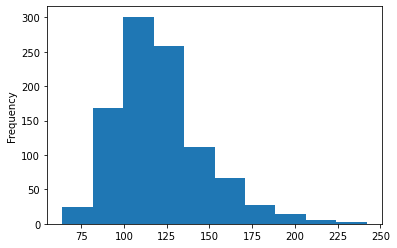

In [ ]:
# histogram of the 'duration' Series (shows the distribution of a numerical variable)
movies['duration'].plot(kind='hist')

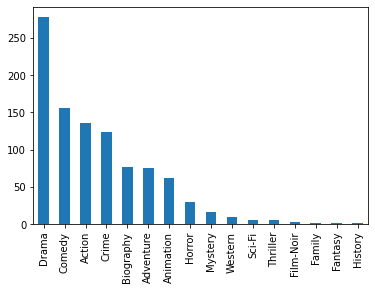

In [ ]:
movies.genre.value_counts().plot(kind='bar')

In [ ]:
# How do I handle missing values in pandas?
# What does "NaN" mean?

# "NaN" is not a string, rather it's a special value: numpy.nan.
# It stands for "Not a Number" and indicates a missing value.
# read_csv detects missing values (by default) when reading the file, and replaces them with 
# this special value.
# read a dataset of UFO reports into a DataFrame

ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [ ]:
a=pd.Series(ufo['City'].value_counts())

In [ ]:
a= pd.DataFrame(a).head()

In [ ]:
a

,City
Seattle,187
New York City,161
Phoenix,137
Houston,108
Las Vegas,105


In [ ]:
#bringing the index column back to a normal column
a.index.name='country'
a.reset_index(inplace=True)
a

,country,City
0,Seattle,187
1,New York City,161
2,Phoenix,137
3,Houston,108
4,Las Vegas,105


In [ ]:
# 'isnull' returns a DataFrame of booleans (True if missing, False if not missing)
ufo.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [ ]:
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [ ]:
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [ ]:
# if 'any' values are missing in a row, then drop that row
ufo.dropna(how='any').shape

(2486, 5)

In [ ]:
# if 'all' values are missing in a row, then drop that row (none are dropped in this case)
ufo.dropna(how='all').shape

(18241, 5)

In [ ]:
# if 'any' values are missing in a row (considering only 'City' and 'Shape Reported'), then drop that row
ufo.dropna(subset=['Colors Reported'],how='any')

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
66,Wexford,BLUE,NaN,PA,7/1/1947 20:00
...,...,...,...,...,...
18213,Pasadena,GREEN,FIREBALL,CA,12/28/2000 19:10
18216,Garden Grove,ORANGE,LIGHT,CA,12/29/2000 16:10
18220,Shasta Lake,BLUE,DISK,CA,12/29/2000 20:30
18233,Anchorage,RED,VARIOUS,AK,12/31/2000 21:00


In [ ]:
# 'value_counts' does not include missing values by default
len(ufo['Shape Reported'].value_counts())

27

In [ ]:
ufo.dropna()

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
82,San Jose,BLUE,CHEVRON,CA,7/15/1947 21:00
...,...,...,...,...,...
18213,Pasadena,GREEN,FIREBALL,CA,12/28/2000 19:10
18216,Garden Grove,ORANGE,LIGHT,CA,12/29/2000 16:10
18220,Shasta Lake,BLUE,DISK,CA,12/29/2000 20:30
18233,Anchorage,RED,VARIOUS,AK,12/31/2000 21:00


In [ ]:
# fill in missing values with a specified value
ufo['Shape Reported'].fillna(value='Various',inplace=True)

In [ ]:
ufo['Shape Reported'].value_counts()

LIGHT        2803
Various      2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
FLARE           1
PYRAMID         1
HEXAGON         1
DOME            1
Name: Shape Reported, dtype: int64

In [ ]:
# What do I need to know about the pandas index?
# read a dataset of alcohol consumption into a DataFrame
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
# every DataFrame has an index (sometimes called the "row labels")

drinks.index

RangeIndex(start=0, stop=193, step=1)

In [ ]:
# column names are also stored in a special "index" object
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
# neither the index nor the columns are included in the shape
drinks.shape

(193, 6)

In [ ]:
# index and columns both default to integers if you don't define them
pd.read_table('http://bit.ly/movieusers', header=None, sep='|').head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
# identification: index remains with each row when filtering the DataFrame
drinks[drinks.continent=='South America']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
6,Argentina,193,25,221,8.3,South America
20,Bolivia,167,41,8,3.8,South America
23,Brazil,245,145,16,7.2,South America
35,Chile,130,124,172,7.6,South America
37,Colombia,159,76,3,4.2,South America
52,Ecuador,162,74,3,4.2,South America
72,Guyana,93,302,1,7.1,South America
132,Paraguay,213,117,74,7.3,South America
133,Peru,163,160,21,6.1,South America
163,Suriname,128,178,7,5.6,South America


In [ ]:
# selection: select a portion of the DataFrame using the index
drinks.loc[23,'beer_servings']

245

In [ ]:
# set an existing column as the index
drinks.set_index('country',inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [ ]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [ ]:
drinks.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
# 'country' data is no longer part of the DataFrame contents
drinks.shape

(193, 5)

In [ ]:
# country name can now be used for selection
drinks.loc['Brazil','beer_servings']

245

In [ ]:
# restore the index name, and move the index back to a column
#drinks.index.name = 'country'
drinks.reset_index(inplace=True)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [ ]:
# How do I select multiple rows and columns from a pandas DataFrame? 
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head(3)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [ ]:
# The loc method is used to select rows and columns by label. You can pass it:

# A single label
# A list of labels
# A slice of labels
# A boolean Series
# A colon (which indicates "all labels")

In [ ]:
# row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors Reported               NaN
Shape Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [ ]:
ufo.shape

(18241, 5)

In [ ]:
ufo.loc[0:2,:]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [ ]:
ufo.loc[np.arange(1,20,2),['City','State']]

,City,State
1,Willingboro,NJ
3,Abilene,KS
5,Valley City,ND
7,Alma,MI
9,Hubbard,OR
11,Waterloo,AL
13,Keokuk,IA
15,Forest Home,CA
17,Hapeville,GA
19,Bering Sea,AK


In [ ]:
ufo.index

RangeIndex(start=0, stop=18241, step=1)

In [ ]:
# accomplish the same thing using double brackets - but using 'loc' is preferred since 
# it's more explicit
ufo[['City','State']].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


In [ ]:
# rows 0 through 2 (inclusive), columns 'City' through 'State' (inclusive)
ufo.loc[0:2, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO


In [ ]:
#States of which city is Oakland

ufo.loc[ufo['City']=='Oakland','State']

1694     CA
2144     CA
4686     MD
7293     CA
8488     CA
8768     CA
10816    OR
10948    CA
11045    CA
12322    CA
12941    CA
16803    MD
17322    CA
Name: State, dtype: object

In [ ]:
# The iloc method is used to select rows and columns by integer position. You can pass

# A single integer position
# A list of integer positions
# A slice of integer positions
# A colon (which indicates "all integer positions")

In [ ]:
ufo.iloc[0:2, 2:3]

,Shape Reported
0,TRIANGLE
1,OTHER


In [ ]:
# The ix method is used to select rows and columns by label or integer position, 
# and should only be used when you need to mix label-based and integer-based 
# selection in the same call.
# read a dataset of alcohol consumption into a DataFrame and set 'country' as the index

drinks=pd.read_csv('http://bit.ly/drinksbycountry', index_col='country')
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [ ]:
# row with label 'Albania', column in position 0
# ix - is deprecated now

drinks.iloc[1,0]

89

In [ ]:
ufo.ix['Algeria', 2]

AttributeError: ignored

In [ ]:
# When should I use the "inplace" parameter in pandas?

# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
# remove the 'City' column (doesn't affect the DataFrame since inplace=False)
ufo.drop('City',axis=1).head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
# remove the 'City' column (does affect the DataFrame since inplace=True)
ufo.drop('City',axis=1,inplace=True)

In [ ]:
ufo.head()

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
# drop a row if any value is missing from that row (doesn't affect the DataFrame since inplace=False)
ufo.dropna(how='any').shape

(2490, 4)

In [ ]:
# fill missing values using "backward fill" strategy (doesn't affect the DataFrame 
# since inplace=False)
ufo.fillna(method='bfill').tail()

,Colors Reported,Shape Reported,State,Time
18236,RED,TRIANGLE,IL,12/31/2000 23:00
18237,RED,DISK,IA,12/31/2000 23:00
18238,RED,LIGHT,WI,12/31/2000 23:45
18239,RED,LIGHT,WI,12/31/2000 23:45
18240,NaN,OVAL,FL,12/31/2000 23:59


In [ ]:
# Why are DataFrame slices inclusive when using .loc, but exclusive when using .iloc?

# label-based slicing is inclusive of the start and stop
ufo.loc[0:4, :]

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00
4,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
# position-based slicing is inclusive of the start and exclusive of the stop
ufo.iloc[0:4, :]

,Colors Reported,Shape Reported,State,Time
0,NaN,TRIANGLE,NY,6/1/1930 22:00
1,NaN,OTHER,NJ,6/30/1930 20:00
2,NaN,OVAL,CO,2/15/1931 14:00
3,NaN,DISK,KS,6/1/1931 13:00


In [ ]:
# How do I randomly sample rows from a DataFrame?
# sample 3 rows from the DataFrame without replacement (new in pandas 0.16.1)
ufo.sample(n=3)

,Colors Reported,Shape Reported,State,Time
13391,YELLOW,LIGHT,CO,4/26/1999 22:15
10231,RED,OTHER,TX,5/11/1997 12:00
869,NaN,CIGAR,CA,5/15/1964 15:00


In [ ]:
# use the 'random_state' parameter for reproducibility
ufo.sample(n=3, random_state=42)

,Colors Reported,Shape Reported,State,Time
217,NaN,DISK,ME,9/15/1952 14:00
12282,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,NaN,FIREBALL,KS,11/13/2000 22:00


In [ ]:
# sample 75% of the DataFrame's rows without replacement
train=ufo.sample(frac=0.75,random_state=42)

In [ ]:
train

,Colors Reported,Shape Reported,State,Time
217,NaN,DISK,ME,9/15/1952 14:00
12282,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,NaN,FIREBALL,KS,11/13/2000 22:00
9834,NaN,NaN,WA,12/21/1996 0:00
7335,NaN,OTHER,NC,5/15/1994 15:30
...,...,...,...,...
3904,RED,FIREBALL,TX,8/15/1978 16:30
14615,NaN,CIRCLE,OR,9/17/1999 20:11
2679,NaN,LIGHT,WA,7/1/1974 21:30
9288,NaN,NaN,FL,5/6/1996 22:00


In [ ]:
# store the remaining 25% of the rows in another DataFrame
test=ufo.loc[~ufo.index.isin(train.index),:]

In [ ]:
test.shape

(4560, 4)

In [ ]:
# How do I create dummy variables in pandas?.

# read the training dataset from Kaggle's Titanic competition
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

In [ ]:
agg# create the 'Sex_male' dummy variable using the 'map' method
train['Sex_male']=train.Sex.map({'female':0,'male':1})

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
train['Age'].groupby(train['Embarked']).agg(['sum','count','mean','max','min'])

,sum,count,mean,max,min
Embarked,,,,,
C,4005.92,130,30.814769,71.0,0.42
Q,786.50,28,28.089286,70.5,2.00
S,16312.75,554,29.445397,80.0,0.67


In [ ]:
train_age=train['Age'].groupby(train['Embarked'])

In [ ]:
for names,group in train_age:
  print(names)
  print(len(group))

C
168
Q
77
S
644


In [ ]:
# use 'get_dummies' with a feature that has 3 possible values
pd.get_dummies(train.Embarked, prefix='Embarked').head(4)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1


In [ ]:
# How do I work with dates and times in pandas?

In [ ]:
# read a dataset of UFO reports into a DataFrame
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
# 'Time' is currently stored as a string
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [ ]:
# convert 'Time' to datetime format
ufo['Time']= pd.to_datetime(ufo.Time)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [ ]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [ ]:
# convenient Series attributes are now available
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [ ]:
ufo.Time.dt.weekday_name.head()

AttributeError: ignored

In [ ]:
ufo.Time.dt.dayofyear.head()

0    152
1    181
2     46
3    152
4    108
Name: Time, dtype: int64

In [ ]:
# convert a single string to datetime format (outputs a timestamp object)
ts = pd.to_datetime('2/1/1999')
ts

Timestamp('1999-02-01 00:00:00')

In [ ]:
ufo.loc[ufo.Time>ts, :].head()

,City,Colors Reported,Shape Reported,State,Time
12959,Lutz,GREEN,FLASH,FL,1999-02-01 18:00:00
12960,Molalla,NaN,DISK,OR,1999-02-01 18:00:00
12961,Ocala,NaN,TRIANGLE,FL,1999-02-01 21:30:00
12962,Arvada,RED GREEN,FLASH,CO,1999-02-01 22:05:00
12963,Arlington,NaN,FIREBALL,TX,1999-02-02 01:15:00


In [ ]:
columns1=["offer_id", "campaign", "varietal", "min_qty", "discount", "origin"]
df_gdp1=pd.read_csv('/content/drive/MyDrive/datasets/gdp.csv',names=columns1)
df_gdp1.head()

##'''
##df_gdp=pd.read_csv('/content/drive/MyDrive/datasets/gdp.csv')
##country	year	pop	continent	lifeExp	gdpPercap
##0	Afghanistan	1952	8425333.0	Asia	28.801	779.445314
##1	Afghanistan	1957	9240934.0	Asia	30.332	820.853030
##2	Afghanistan	1962	10267083.0	Asia	31.997	853.100710
##3	Afghanistan	1967	11537966.0	Asia	34.020	836.197138
##'''

,offer_id,campaign,varietal,min_qty,discount,origin
0,country,year,pop,continent,lifeExp,gdpPercap
1,Afghanistan,1952,8425333,Asia,28.801,779.4453145
2,Afghanistan,1957,9240934,Asia,30.332,820.8530296
3,Afghanistan,1962,10267083,Asia,31.997,853.10071
4,Afghanistan,1967,11537966,Asia,34.02,836.1971382


In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
columns2=["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers = pd.read_excel('/content/drive/MyDrive/datasets/WineKMC.xlsx', names=columns2)
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [ ]:
columns3= ["customer_name", "offer_id"]
df_transactions = pd.read_excel('/content/drive/MyDrive/datasets/WineKMC.xlsx',sheet_name=1,names=columns3,)
df_transactions.head()

,customer_name,offer_id
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26


In [ ]:
df_transactions['n']=1

In [ ]:
df_transactions

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1
...,...,...,...
319,Fisher,11,1
320,Fisher,22,1
321,Fisher,28,1
322,Fisher,30,1


In [ ]:
user_usage = pd.read_csv("/content/drive/MyDrive/datasets/user_usage.csv")
user_device = pd.read_csv("/content/drive/MyDrive/datasets/user_device.csv")
device = pd.read_csv("/content/drive/MyDrive/datasets/device.csv")

In [ ]:
user_usage.columns

Index(['outgoing_mins_per_month', 'outgoing_sms_per_month', 'monthly_mb',
       'use_id'],
      dtype='object')

In [ ]:
user_device.columns

Index(['use_id', 'user_id', 'platform', 'platform_version', 'device',
       'use_type_id'],
      dtype='object')

In [ ]:
device.columns

Index(['Retail Branding', 'Marketing Name', 'Device', 'Model'], dtype='object')

In [ ]:
result=pd.merge(user_usage,user_device[['use_id','platform','device']],on='use_id')

In [ ]:
result.shape

(159, 6)

In [ ]:
pd.__version__

'1.1.5'

In [ ]:
pd.show_versions()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)



INSTALLED VERSIONS
------------------
commit           : b5958ee1999e9aead1938c0bba2b674378807b3d
python           : 3.7.11.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.104+
Version          : #1 SMP Sat Jun 5 09:50:34 PDT 2021
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.1.5
numpy            : 1.19.5
pytz             : 2018.9
dateutil         : 2.8.2
pip              : 21.1.3
setuptools       : 57.4.0
Cython           : 0.29.24
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.5
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1.